In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.stats import norm,describe
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Data Preparation

In [2]:
# importing dataset
data = pd.read_csv('energydata_complete.csv'); data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [3]:
# removing dates column
data = data.drop(columns='date')

# rearranging variables
Ts = ['T{}'.format(i) for i in range(1,10)]
RHs = ['RH_{}'.format(i) for i in range(1,10)]
data = data[list(data.columns[:2])+Ts+RHs+list(data.columns[-8:])]

# splitting into train and test
train_raw,test_raw = train_test_split(data,test_size=0.30,random_state=123)

# classifying response > median
train_raw['high_appliances'] = np.where(train_raw.Appliances > train_raw.Appliances.median(),1,0)
test_raw['high_appliances'] = np.where(test_raw.Appliances > train_raw.Appliances.median(),1,0)

# splitting datasets to X,y1,y2
X_train = train_raw.iloc[:,1:-1]
X_test = test_raw.iloc[:,1:-1]

y1_train = train_raw.iloc[:,0]
y1_test = test_raw.iloc[:,0]

y2_train = train_raw.iloc[:,-1]
y2_test = test_raw.iloc[:,-1]

# standardizing all the features
X_train_scaled = (X_train_raw-X_train_raw.mean())/X_train_raw.std()
X_test_scaled  = (X_test_raw-X_train_raw.mean())/X_train_raw.std()

# concatenating y1, scaled-X, y2
train = pd.concat([y1_train,X_train_scaled,y2_train],axis=1)
test = pd.concat([y1_test,X_test_scaled,y2_test],axis=1)

# summary stats for train data
train.describe().T

C:\Users\gpskc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\gpskc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,mean,std,min,25%,50%,75%,max
Appliances,13814.0,9.801289e+01,102.603252,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,13814.0,-1.045325e-15,1.000000,-0.478944,-0.478944,-0.478944,-0.478944,7.099676
T1,13814.0,-1.446422e-12,1.000000,-3.046884,-0.580788,-0.058994,0.582895,2.835718
T2,13814.0,-1.074291e-12,1.000000,-1.933718,-0.696565,-0.162029,0.534532,4.315650
T3,13814.0,-9.815758e-13,1.000000,-2.517280,-0.736390,-0.086539,0.520319,3.435554
T4,13814.0,-1.119966e-12,1.000000,-2.819124,-0.650469,-0.096076,0.605069,2.610667
T5,13814.0,-1.321432e-12,1.000000,-2.309547,-0.708787,-0.113910,0.572516,3.349896
T6,13814.0,-1.715317e-14,1.000000,-2.288231,-0.702238,-0.097261,0.544695,3.316443
T7,13814.0,-1.136663e-12,1.000000,-2.307506,-0.743558,-0.113569,0.644781,2.688308
T8,13814.0,-9.220949e-13,1.000000,-2.898458,-0.636268,0.034441,0.692094,2.653983


## Data Exploration

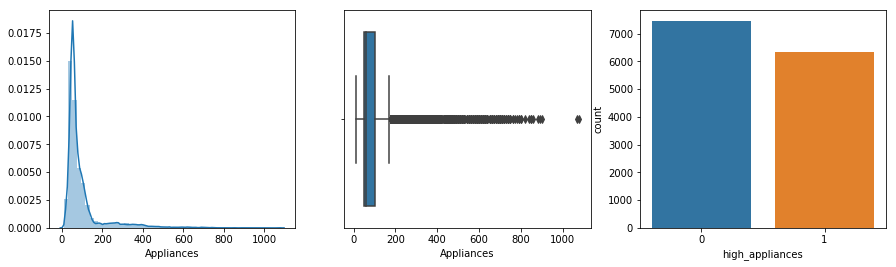

In [4]:
# target distribution in train
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.distplot(train.Appliances,ax=axes[0])
sns.boxplot(train.Appliances,ax=axes[1])
sns.countplot(train.high_appliances,ax=axes[2])
plt.show()

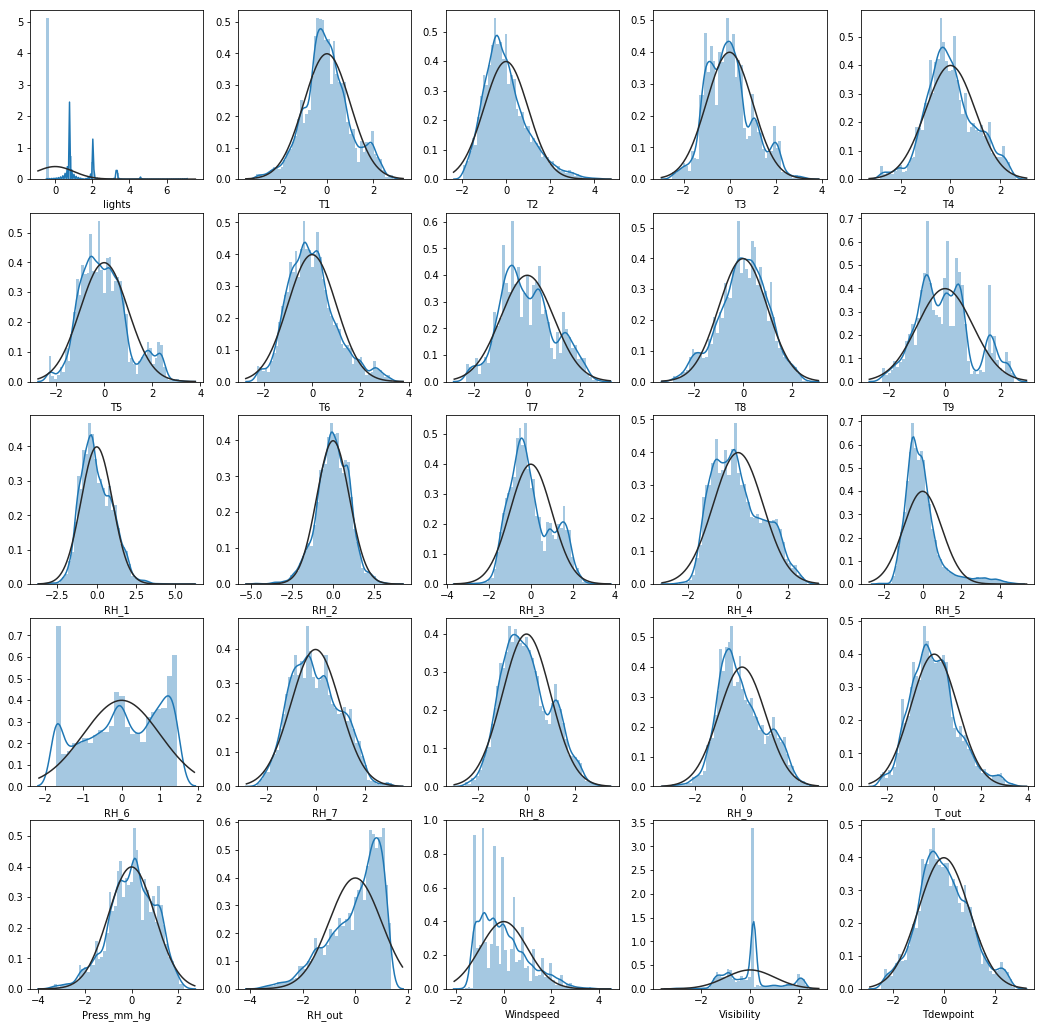

In [5]:
# features distribution in train
fig,axes = plt.subplots(5,5,figsize=(18,18))
for i,col in enumerate(train.columns[1:26]): sns.distplot(train[col],fit=norm,ax=axes[i//5,i%5])

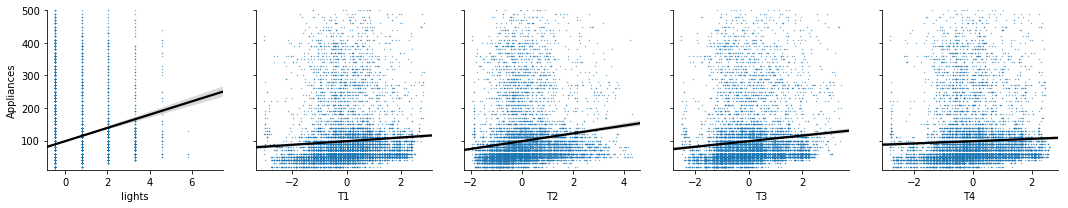

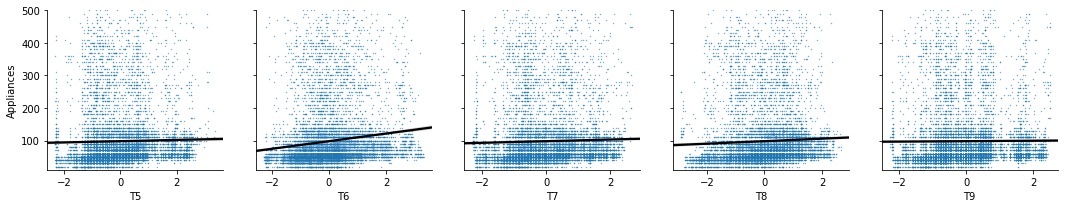

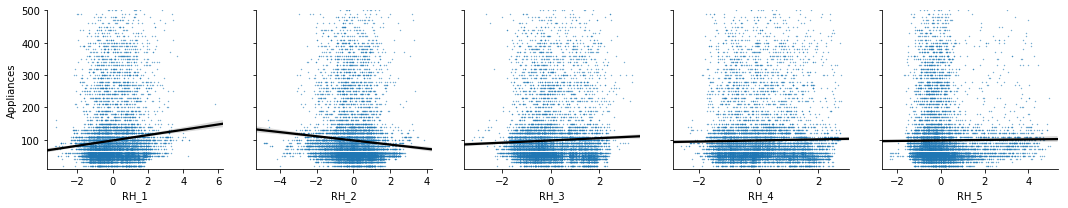

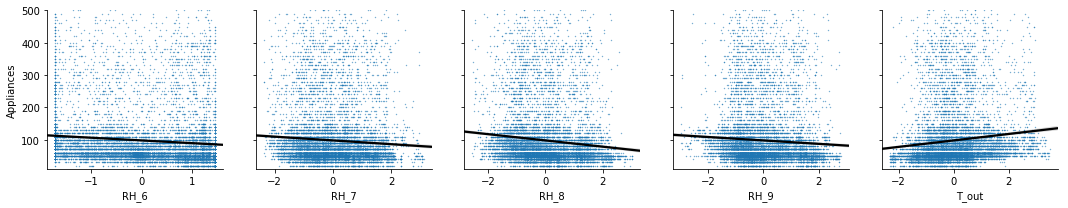

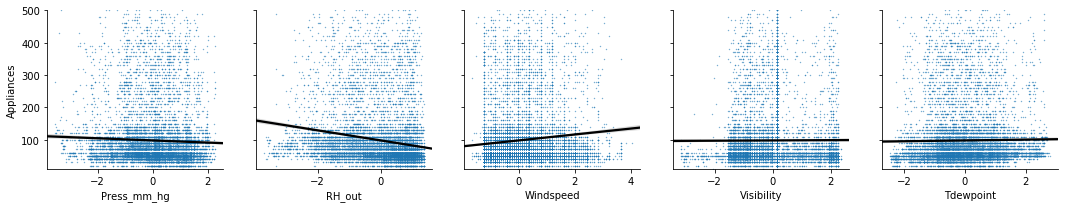

In [6]:
# scatters between target and features
i=1
while i<25:
    g = sns.PairGrid(train,y_vars=train.columns[0],x_vars=train.columns[i:i+5],height=3)
    g.map(sns.regplot,scatter_kws={'s':0.125},line_kws={'color':'k'}).set(ylim=(10,500))
    i+=5

rv1 & rv2 are identically distributed and difference between them is 0.0


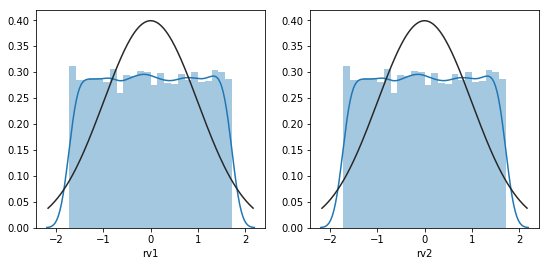

In [7]:
# distribution of rv1 and rv2 in train
fig,axes = plt.subplots(1,2,figsize=(9,4))
sns.distplot(train.rv1,fit=norm,ax=axes[0])
sns.distplot(train.rv2,fit=norm,ax=axes[1])

# difference between rv1, rv2 varibles
rv_diff = train.rv1 - train.rv2
print('rv1 & rv2 are identically distributed and difference between them is',rv_diff.sum())

Both the random variables are not contributing to variation in appliances


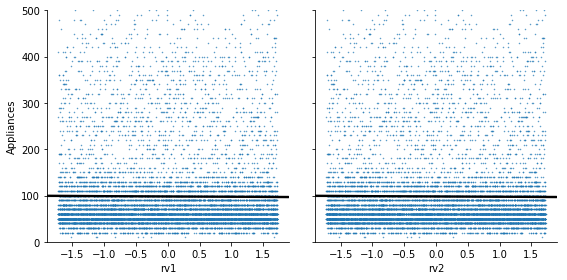

In [8]:
# relation between target and rv1,rv2 in train
g=sns.PairGrid(train,y_vars=train.columns[0],x_vars=train.columns[-3:-1],height=4)
g.map(sns.regplot,scatter_kws={'s':0.25},line_kws={'color':'k'}).set(ylim=(0,500))
print('Both the random variables are not contributing to variation in appliances')

RH_4 has 0.90 correlation with RH_3,RH_7 which have higher correlation with y than RH_4. So excluding RH_4 from model
T9 has >= 0.90 correlation with T3,T5,T7 which have higher correlation with y than T9. Hence excluding T9 from model
T_out has 0.98 correlation with T6 which has higher correlation with y than T_out. Hence excluding T_out from model


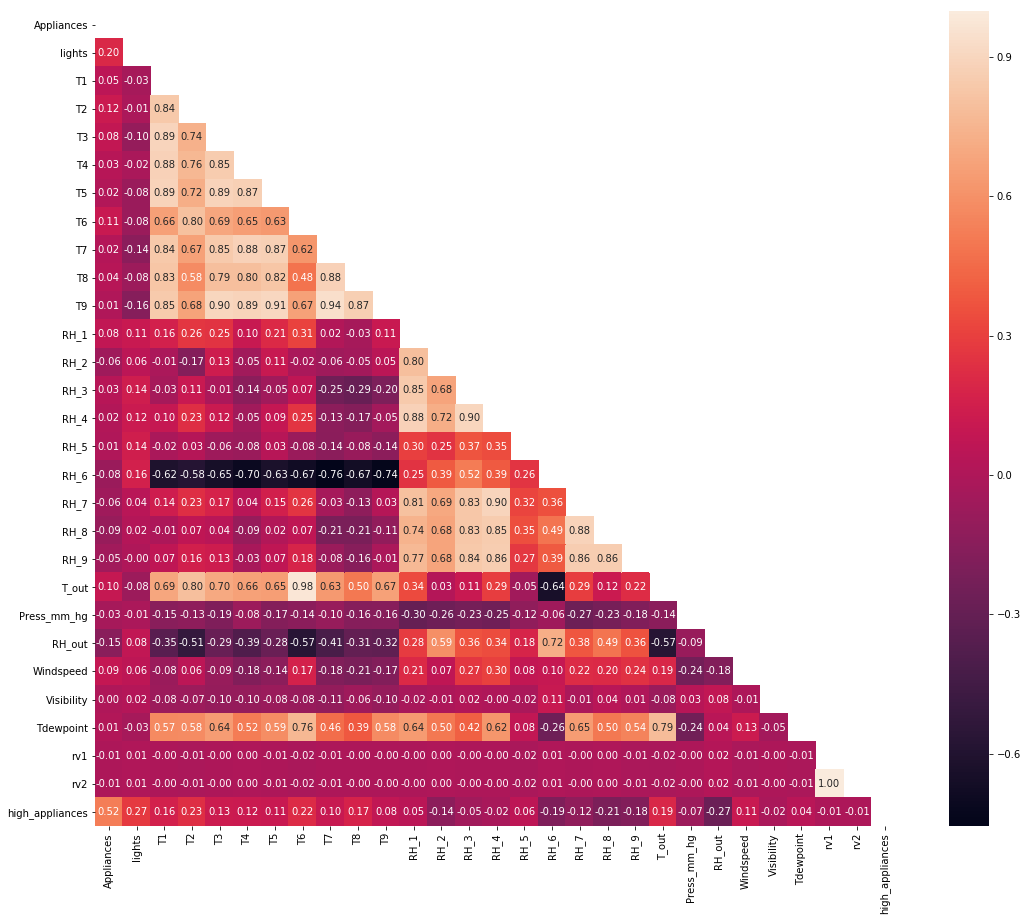

In [9]:
# correlation matrix of train dataset
mask = np.zeros_like(train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,axes = plt.subplots(figsize=(18,15))
sns.heatmap(train.corr(),annot=True,fmt=".2f",mask=mask)

print('RH_4 has 0.90 correlation with RH_3,RH_7 which have higher correlation with y than RH_4. So excluding RH_4 from model')
print('T9 has >= 0.90 correlation with T3,T5,T7 which have higher correlation with y than T9. Hence excluding T9 from model')
print('T_out has 0.98 correlation with T6 which has higher correlation with y than T_out. Hence excluding T_out from model')

## Feature Selection

In [10]:
# picking 17 regression features
# rule1: |y-correlation| >= 0.03
# rule2: excluding RH_4,T9,T_out
X_17_bestvar = list(train.corr()[abs(train.corr())>=0.03].drop(labels=['RH_4','T9','T_out']).iloc[1:-1,0].dropna().index)
X_17b_train = train[X_17_bestvar]
X_17b_test = test[X_17_bestvar]
list(X_17b_train.columns)

['lights',
 'T1',
 'T2',
 'T3',
 'T4',
 'T6',
 'T8',
 'RH_1',
 'RH_2',
 'RH_3',
 'RH_6',
 'RH_7',
 'RH_8',
 'RH_9',
 'Press_mm_hg',
 'RH_out',
 'Windspeed']

In [11]:
# picking 10 features randomly
np.random.seed(3421111)
X_10_randvar=[]
for i in sorted(list(np.random.choice(range(1,26),10,replace=False))): X_10_randvar.append(list(train.columns)[i])
X_10r_train = train[X_10_randvar]
X_10r_test = test[X_10_randvar]
list(X_10r_train.columns)

['T1',
 'T3',
 'T5',
 'T8',
 'RH_3',
 'RH_5',
 'Press_mm_hg',
 'RH_out',
 'Visibility',
 'Tdewpoint']

In [12]:
# picking 10 best suited features
# rule1: |y-correlation| >= 0.06
# rule2: excluding RH_4,T9,T_out
X_10_bestvar = list(train.corr()[abs(train.corr())>=0.06].drop(labels=['RH_4','T9','T_out']).iloc[1:-1,0].dropna().index)
X_10b_train = train[X_10_bestvar]
X_10b_test = test[X_10_bestvar]
list(X_10b_train.columns)

['lights',
 'T2',
 'T3',
 'T6',
 'RH_1',
 'RH_2',
 'RH_6',
 'RH_8',
 'RH_out',
 'Windspeed']

## Gradient Descent Functions

In [13]:
# initial beta parameters for regression
def beta_in(r,s=123):
    np.random.seed(s)
    return np.random.uniform(-1,1,size=r+1)

# gradient descent for linear regression
def linear_gd(X,y,alpha,beta,threshold=10**-4,max_iters=10**4):
    m,cost_list = X.shape[0],[]
    X_1s = np.concatenate((np.ones((m,1)),np.array(X)),axis=1)
    for i in range(max_iters):
        yhat = X_1s.dot(beta)
        loss = yhat-y
        cost = 0.5*np.sum(loss**2)/m
        grad = X_1s.T.dot(loss)/m
        beta = beta-(alpha*grad)
        cost_list = np.append(cost_list,cost)
        if len(cost_list) >= 2:
            if cost_list[-2]-cost_list[-1] > threshold: continue
            else: break
        else: continue
    return [beta,cost_list]

# gradient descent for logistic regression
def logistic_gd(X,y,alpha,beta,threshold=10**-4,max_iters=10**4):
    m,cost_list = X.shape[0],[]
    X_1s = np.concatenate((np.ones((m,1)),np.array(X)),axis=1)
    for i in range(max_iters):
        yhat = 1/(1+np.exp(-1*X_1s.dot(beta)))
        loss = yhat-y
        cost = -1*(y.T.dot(np.log(yhat))+(1-y).T.dot(np.log(1-yhat)))/m
        grad = X_1s.T.dot(loss)/m
        beta = beta-(alpha*grad)
        cost_list = np.append(cost_list,cost)
        if len(cost_list) >= 2:
            if cost_list[-2]-cost_list[-1] > threshold: continue
            else: break
        else: continue
    return [beta,cost_list]

def lin_alpha_graph(X,y,iters,thres=10**-4):
    betas = beta_in(X.shape[1])
    alpha = [0.20,0.10,0.05,0.02,0.01]
    lines = []
    for z,a in enumerate(alpha):
        cost_func = linear_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
        iteration = np.arange(1,len(cost_func)+1)
        lines += plt.plot(iteration,cost_func,)
    return lines

def log_alpha_graph(X,y,iters,thres=10**-8):
    betas = beta_in(X.shape[1])
    alpha = [0.20,0.10,0.05,0.02,0.01]
    lines = []
    for z,a in enumerate(alpha):
        cost_func = logistic_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
        iteration = np.arange(1,len(cost_func)+1)
        lines += plt.plot(iteration,cost_func,)
    return lines

## Experiment 1a - linear regression

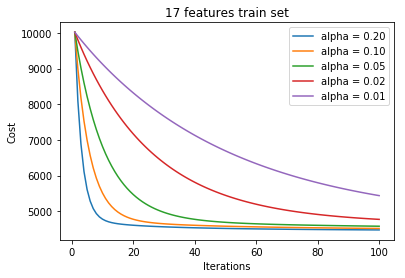

In [14]:
# tuning alpha holding threshold = 0.0001 for 100 iterations in train
lines = lin_alpha_graph(X_17b_train,y1_train,100)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('17 features train set')
plt.show()

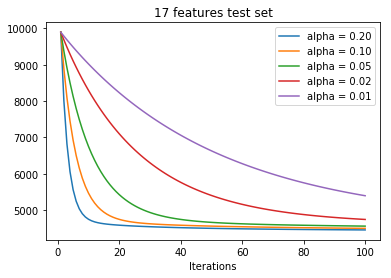

In [15]:
# tuning alpha holding threshold = 0.0001 for 100 iterations in test
lines = lin_alpha_graph(X_17b_test,y1_test,100)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.title('17 features test set')
plt.show()

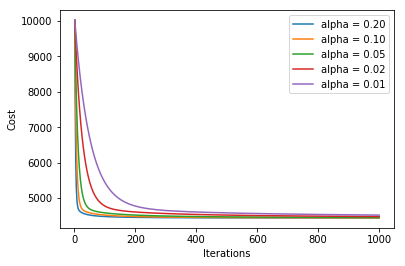

In [16]:
# tuning alpha holding threshold = 0.0001 for 1000 iterations in train
lines = lin_alpha_graph(X_17b_train,y1_train,1000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

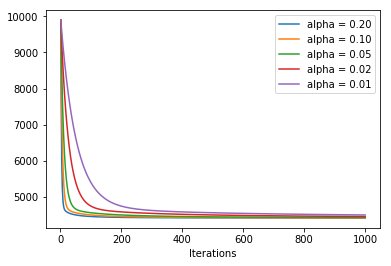

In [17]:
# tuning alpha holding threshold = 0.0001 for 1000 iterations in test
lines = lin_alpha_graph(X_17b_test,y1_test,1000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.show()

In [18]:
# actual number of iterations for convergence
X,y = X_17b_train,y1_train
betas = beta_in(X.shape[1])
alpha = [0.20,0.10,0.05,0.02,0.01]
iters = 10**6
thres = 10**-16
lines = []
for z,a in enumerate(alpha):
    start = dt.now()
    cost = linear_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
    print(a,dt.now()-start,len(cost),cost[-1])

0.2 0:00:06.691537 3999 4440.6617709813245
0.1 0:00:11.806149 7773 4440.661770981505
0.05 0:00:25.942901 14978 4440.661770982038
0.02 0:00:58.769414 35874 4440.66177098365
0.01 0:01:57.518055 69513 4440.6617709863895


In [19]:
# beta parameters from the gradient descent
beta_lin = beta_in(X_17b_train.shape[1])
linear_gd(X_17b_train,y1_train,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[0]

array([ 98.01288548,  18.54147175,   1.09711505, -40.14556966,
        43.74322755, -19.22654158,  12.58842312,   7.14824077,
        63.39582468, -62.21176471,  20.40863402,   8.6189004 ,
        -9.11243993, -23.31183023,  -6.71711914,   1.67652653,
         0.84481713,   4.23289679])

In [20]:
# beta parameters from linear reg function
linear_model = LinearRegression().fit(X_17b_train,y1_train)
print(linear_model.intercept_)
print(linear_model.coef_)
linear_model.score(X_17b_train,y1_train)

98.01288547849009
[ 18.54146987   1.09717034 -40.14565295  43.74321967 -19.22653735
  12.58844087   7.14823777  63.39588082 -62.21183465  20.40863818
   8.61889552  -9.11243646 -23.31183302  -6.71711449   1.67652587
   0.84482867   4.23289566]


0.15630227289210352

## Experiment 1b - logistic regression

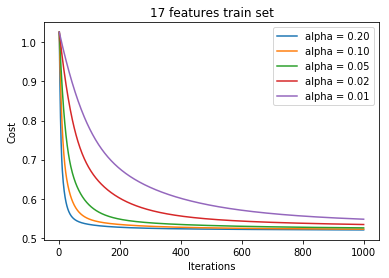

In [21]:
# tuning alpha holding threshold = 0.0001 for 1000 iterations in train
lines = log_alpha_graph(X_17b_train,y2_train,1000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('17 features train set')
plt.show()

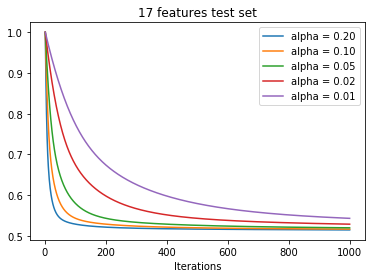

In [22]:
# tuning alpha holding threshold = 0.0001 for 1000 iterations in test
lines = log_alpha_graph(X_17b_test,y2_test,1000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.title('17 features test set')
plt.show()

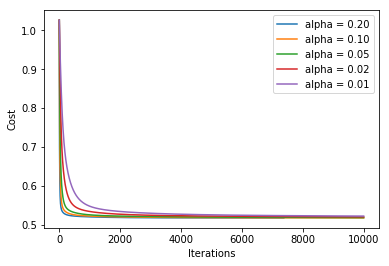

In [23]:
# tuning alpha holding threshold = 0.0001 for 10000 iterations in train
lines = log_alpha_graph(X_17b_train,y2_train,10000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

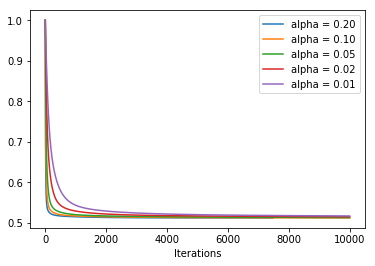

In [24]:
# tuning alpha holding threshold = 0.0001 for 10000 iterations in test
lines = log_alpha_graph(X_17b_test,y2_test,10000)
plt.legend(lines[:5],['alpha = 0.20','alpha = 0.10','alpha = 0.05','alpha = 0.02','alpha = 0.01'])
plt.xlabel('Iterations')
plt.show()

In [25]:
# actual number of iterations for convergence
X,y = X_17b_train,y2_train
betas = beta_in(X.shape[1])
alpha = [0.20,0.10,0.05,0.02,0.01]
iters = 10**6
thres = 10**-16
lines = []
for z,a in enumerate(alpha):
    start = dt.now()
    cost = logistic_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
    print(a,dt.now()-start,len(cost),cost[-1])

0.2 0:00:44.071572 29004 0.5175267603268712
0.1 0:01:27.791214 55549 0.5175267603272693
0.05 0:02:54.530385 109001 0.5175267603276069
0.02 0:09:23.799153 258778 0.5175267603296202
0.01 0:22:42.206847 502194 0.5175267603322398


In [26]:
# beta parameters from the gradient descent
beta_log = beta_in(X_17b_train.shape[1])
logistic_gd(X_17b_train,y2_train,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[0]

array([-0.15078505,  0.68979947,  0.4766685 , -0.70678024,  0.35107595,
       -0.85175531,  0.569043  ,  0.76855266,  2.18618446, -1.4336705 ,
        0.08040283,  0.54689224, -0.03967942, -0.78381726, -0.72757586,
        0.019646  , -0.11550527,  0.20180064])

In [27]:
# beta parameters from logistic reg function
logit_model = LogisticRegression().fit(X_17b_train,y2_train)
print(logit_model.intercept_)
print(logit_model.coef_)

C:\Users\gpskc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-0.15184937]
[[ 0.68961778  0.44913351 -0.6619728   0.35055174 -0.84871151  0.56190829
   0.765265    2.1388111  -1.38755513  0.08496819  0.54466645 -0.04370524
  -0.77953882 -0.72717235  0.01881383 -0.11977967  0.2019139 ]]


## Experiment 2

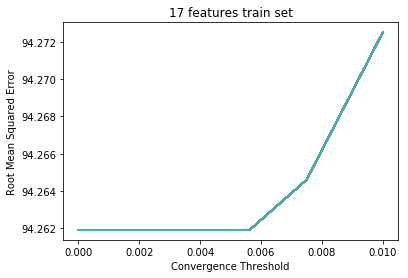

In [28]:
# tuning threshold holding alpha as constant
X,y = X_17b_train,y1_train
betas = beta_in(X.shape[1])
alpha = 0.10
iters = 10**6
thres = []
rmse = []
for t in [0.01*0.75**(n) for n in range(100)]:
    cost = linear_gd(X,y,alpha,betas,threshold=t,max_iters=iters)[1][-1]
    rmse.append(np.sqrt(2*cost))
    thres += [t]
    plt.plot(thres,rmse)
plt.xlabel('Convergence Threshold')
plt.ylabel('Root Mean Squared Error')
plt.title('17 features train set')
plt.show()

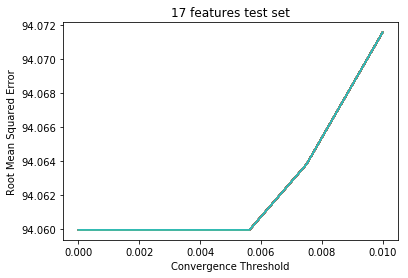

In [29]:
# tuning threshold holding alpha as constant
X,y = X_17b_test,y1_test
betas = beta_in(X.shape[1])
alpha = 0.10
iters = 10**6
thres = []
rmse = []
for t in [0.01*0.75**(n) for n in range(100)]:
    cost = linear_gd(X,y,alpha,betas,threshold=t,max_iters=iters)[1][-1]
    rmse.append(np.sqrt(2*cost))
    thres += [t]
    plt.plot(thres,rmse)
plt.xlabel('Convergence Threshold')
plt.ylabel('Root Mean Squared Error')
plt.title('17 features test set')
plt.show()

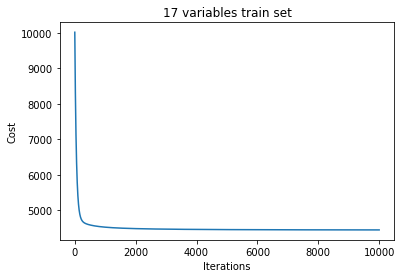

In [30]:
X,y = X_17b_train,y1_train
betas = beta_in(X.shape[1])
alpha = 0.10
iters = 10**4
thres = 0.005
lines = []
cost_func = linear_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
iteration = np.arange(1,len(cost_func)+1)
lines = plt.plot(iteration,cost_func)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('17 variables train set')
plt.show()

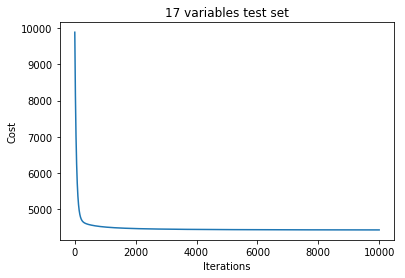

In [31]:
X,y = X_17b_test,y1_test
betas = beta_in(X.shape[1])
alpha = 0.10
iters = 10**4
thres = 0.005
lines = []
cost_func = linear_gd(X,y,a,betas,threshold=thres,max_iters=iters)[1]
iteration = np.arange(1,len(cost_func)+1)
plt.plot(iteration,cost_func)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('17 variables test set')
plt.show()

## Experiment 3

In [32]:
# 17 features train error
start = dt.now()
beta_lin = beta_in(X_17b_train.shape[1])
cost = linear_gd(X_17b_train,y1_train,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:09.128192 3999 4440.6617709813245 94.24077430689249


In [33]:
# 17 features test error
start = dt.now()
beta_lin = beta_in(X_17b_test.shape[1])
cost = linear_gd(X_17b_test,y1_test,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:03.353628 3845 4421.805876995296 94.04047933730767


In [34]:
# 10 random features train error
start = dt.now()
beta_lin = beta_in(X_10r_train.shape[1])
cost = linear_gd(X_10r_train,y1_train,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:01.315817 781 4972.68320245037 99.72645789809613


In [35]:
# 10 random features test error
start = dt.now()
beta_lin = beta_in(X_10r_test.shape[1])
cost = linear_gd(X_10r_test,y1_test,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:00.568731 807 4934.001496164121 99.33782256687653


## Experiment 4

In [36]:
# 10 best features train error
start = dt.now()
beta_lin = beta_in(X_10b_train.shape[1])
cost = linear_gd(X_10b_train,y1_train,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:04.354566 1938 4504.051609475729 94.9110279100983


In [37]:
# 10 best features test error
start = dt.now()
beta_lin = beta_in(X_10b_test.shape[1])
cost = linear_gd(X_10b_test,y1_test,0.20,beta_lin,threshold=10**-16,max_iters=10**6)[1]
reps = len(cost)
rmse = np.sqrt(2*cost[-1])
print(dt.now()-start,reps,cost[-1],rmse)

0:00:02.020111 1900 4470.482316989395 94.55667419055511
